In [6]:
import numpy as np 

arr = np.arange(24).reshape(2,3,4)
print(arr)
print("slice:")
print(np.take(np.take(arr, [0,2], axis=2), [1], axis=1))

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
slice:
[[[ 4  6]]

 [[16 18]]]


In [5]:
ls = [0, 1, 2]
ls.pop(0)
print(ls)

[1, 2]


In [7]:
a = np.arange(10)
b = 0.5*a
np.savetxt('test.txt', [a, b])

In [3]:
import numpy as np
print( np.load('../data_cache/2D/loss_1000.npy')[-1][-1])

2.105988916959708


In [9]:
x = np.arange(3)
y = 1
print(type(np.append(x, y)))

<class 'numpy.ndarray'>


In [10]:
a = [1,2]
b = [3,4]
print(a+b)

[1, 2, 3, 4]


In [ ]:
str = "0 saff fasfd "


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [43]:
import numpy as np

# Get U
U = np.zeros((30, 5))
with open("../data_cache/iter1500/30rounds_info.txt", "r") as f:
    i = 0
    for line in f:
        str_list = line.strip().split(',')
        flt_list = str_list[1].strip()[5:-1].split(' ')
        U[i] = np.array([float(flt_list[fid]) for fid in range(len(flt_list)) if flt_list[fid] != ''])
        print("line%d:"%i, U[i])
        i+=1
        # grad = float()

line0: [-6.41833944e+00  2.44300990e-03  7.81584427e-04  4.27117930e-03
 -4.86686150e-01]
line1: [-6.43724928e+00  3.77863468e-03  1.09278150e-03  8.31831462e-03
 -4.72210271e-01]
line2: [-6.45607739e+00  4.41691403e-03 -3.36170889e-04  1.29419756e-02
 -4.57799838e-01]
line3: [-6.47593184e+00  7.20880404e-03  6.73372220e-04  1.66978771e-02
 -4.43750950e-01]
line4: [-6.49582010e+00  9.45256988e-03  3.59144078e-04  2.05744279e-02
 -4.30683092e-01]
line5: [-6.51535966e+00  1.13943834e-02  4.65980711e-05  2.61025420e-02
 -4.16203961e-01]
line6: [-6.53701126e+00  1.24849717e-02  1.31412365e-03  3.00405610e-02
 -4.01583803e-01]
line7: [-6.56027889e+00  1.39505830e-02  8.28146913e-04  3.41336423e-02
 -3.87423661e-01]
line8: [-6.58327931e+00  1.65072658e-02  2.54114059e-03  3.82340989e-02
 -3.72251278e-01]
line9: [-6.60688399e+00  1.78673264e-02  1.20377856e-03  4.26142418e-02
 -3.56912421e-01]
line10: [-6.63138723e+00  2.17865953e-02  1.20618577e-03  4.85095803e-02
 -3.40035486e-01]
line11: [

In [44]:
# Get L

L = np.zeros(30)
with open("../data_cache/iter1500/30rounds_info.txt", "r") as f:
    i = 0
    for line in f:
        str_list = line.strip().split(',')
        flt_L = float(str_list[2].strip()[4:])
        L[i] = flt_L
        # print("line%d:"%(i), flt_L)
        i+=1

UL = np.hstack((U, L.reshape(-1,1)))
np.save("../data_cache/iter1500/UL30.npy", UL)
print(UL.shape)

(30, 6)


In [41]:
# Get grad_L

grad_L = np.zeros((30, 5))
with open("../data_cache/iter1500/30rounds_info.txt", "r") as f:
    i = 0
    for line in f:
        str_list = line.strip().split(',')
        flt_grad = str_list[3].strip()[11:-1].split(' ')
        grad_L[i] = np.array([float(flt_grad[fid]) for fid in range(len(flt_grad)) if flt_grad[fid] != ''])
        # print("line%d:"%i, grad_L[i])
        i+=1
print(grad_L.shape)
np.save("../data_cache/iter1500/grad_L30.npy", grad_L)

(30, 5)


In [57]:
# Get round id
with open("../data_cache/iter1500/30rounds_info.txt", "r") as f:
    for line in f:
        str_list = line.strip().split(',')
        round_id = int(str_list[0].strip()[6:])
        print(round_id)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [ ]:
Loss = np.load('../data_cache/2D/loss_1500.npy')
print(Loss)

[]


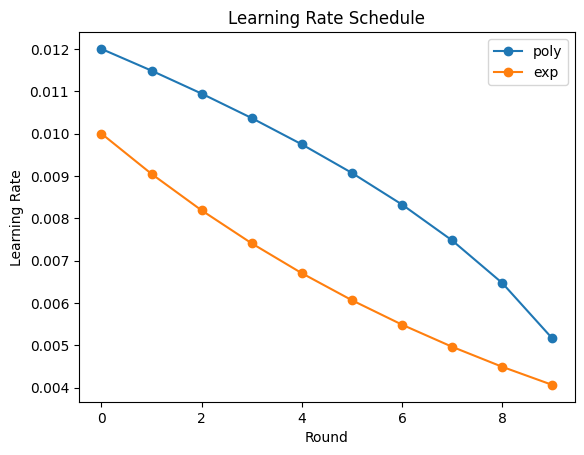

In [55]:
import matplotlib.pyplot as plt

start = 0
rounds = 10

lr_poly = [0.01*(1-(round-start)/(rounds-start))**0.5 + 0.002 for round in range(start, rounds)]
lr_exp = [0.01*np.exp(-round/(rounds-start)) for round in range(start, rounds)]
plt.plot(np.arange(start, rounds), lr_poly, '-o', np.arange(start, rounds), lr_exp, '-o')
plt.legend(['poly', 'exp'])
plt.xlabel('Round')
plt.ylabel('Learning Rate')
plt.title("Learning Rate Schedule")
plt.show()